In [1]:
import numpy as np 
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from copy import deepcopy

from TensorDecisionTreeRegressor import *
#Debugging import
import importlib
var = 'TensorDecisionTreeRegressor'
package = importlib.import_module(var)
for name, value in package.__dict__.items():
    if not name.startswith("__"):
        globals()[name] = value

from GradientBoosting import *
# Gradient Boosting Regressor Class

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create a more complex synthetic dataset
np.random.seed(42)
X_fake_complex = np.random.rand(1000, 3)
X_fake_complex_test = np.random.rand(2000, 3)

# Creating a non-linear function of X including interactions
def test_func(X):
    y = 10 * np.sin(np.pi * X[:, 0] * X[:, 1]) +\
        20 * (X[:, 2] - 0.5) ** 2 +\
        10 * X[:, 2] +\
        0.1 * np.random.randn(X.shape[0])
    return y
y_fake_complex = test_func(X_fake_complex)
y_fake_complex_test = test_func(X_fake_complex_test)

# Train a single decision tree regressor on the complex dataset
single_tree_regressor_complex = DecisionTreeRegressor(max_depth=2)
single_tree_regressor_complex.fit(X_fake_complex, y_fake_complex)
single_tree_predictions_complex = single_tree_regressor_complex.predict(X_fake_complex_test)

# Initialize and train the Gradient Boosting Regressor on the complex dataset
gradient_boosting_regressor_complex = GradientBoostingRegressor(
    n_estimators=100,  # Increasing the number of estimators for better learning
    learning_rate=0.1,
    weak_learner=DecisionTreeRegressor(max_depth=2).fit(X_fake_complex,np.random.normal(size=y_fake_complex.shape))
)
gradient_boosting_regressor_complex.fit(X_fake_complex, y_fake_complex, X_fake_complex_test, y_fake_complex_test)
gb_predictions_complex = gradient_boosting_regressor_complex.predict(X_fake_complex_test)

# Calculate the mean squared errors for both models on the complex dataset
single_tree_mse_complex = mean_squared_error(y_fake_complex_test, single_tree_predictions_complex)
gb_mse_complex = mean_squared_error(y_fake_complex_test, gb_predictions_complex)

single_tree_mse_complex, gb_mse_complex, single_tree_predictions_complex[:5], gb_predictions_complex[:5]


0 0 training MSE === 166.29453929183185
0 0 testing MSE === 162.71242766334527
0 1 training MSE === 136.7605551736814
0 1 testing MSE === 133.87082392819477
0 2 training MSE === 112.79725444237303
0 2 testing MSE === 110.40877977657811
0 3 training MSE === 93.25639969154773
0 3 testing MSE === 91.19752022979624
0 4 training MSE === 77.35197852919266
0 4 testing MSE === 75.6504595141559
0 5 training MSE === 64.41175307426039
0 5 testing MSE === 62.92872256507726
0 6 training MSE === 53.8023661303049
0 6 testing MSE === 52.45247717994237
0 7 training MSE === 45.15150684759964
0 7 testing MSE === 44.043342666624696
0 8 training MSE === 38.08191685323825
0 8 testing MSE === 37.055792280223265
0 9 training MSE === 32.30186430970791
0 9 testing MSE === 31.404318647248612
0 10 training MSE === 27.529929709152494
0 10 testing MSE === 26.7540281532102
0 11 training MSE === 23.63625275790552
0 11 testing MSE === 22.99575909555394
0 12 training MSE === 20.2000401852535
0 12 testing MSE === 19.692

(9.619249369589355,
 1.1121729503901443,
 array([11.47337496, 18.07036064,  6.89063784, 11.47337496, 11.47337496]),
 array([12.95795352, 19.34198673,  9.06962175,  5.65405109, 10.58923313]))

In [3]:
# Faking a 3D X and corresponding y
np.random.seed(42) # for reproducibility
X_fake = np.random.rand(1000, 4, 4)  # 1000 samples, 4*4 features
X_fake_test = np.random.rand(1000, 4, 4)  # 1000 samples, 4*4 features


def test_func_tensor(X):
    y = 10 * np.sin(np.pi * X[:, 0, 1] * X[:, 1, 0]) +\
    20 * (X[:, 2, 0] - 0.5) ** 2 +\
    10 * X[:, 0, 2] +\
    0.1 * np.random.randn(X.shape[0])
    return y

y_fake = test_func_tensor(X_fake)
y_fake_test = test_func_tensor(X_fake_test)

# Reshape X_fake for regression (the weak learner expects 2D input)
X_fake_reshaped = X_fake.reshape(100, -1)

# Initialize Gradient Boosting Regressor with a simple decision tree as weak learner
weak_learner = TensorDecisionTreeRegressor(max_depth=3, min_samples_split=2, split_method='variance',split_rank=3,n_mode=4)
gradient_boosting_regressor = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    weak_learner=weak_learner
)
# Fit a single tree model
weak_learner.fit(X_fake, y_fake)
weak_predictions = weak_learner.predict(X_fake_test)

# Fit the Gradient Boosting model
gradient_boosting_regressor.fit(X_fake, y_fake, X_fake_test, y_fake_test)

# Predict
predictions = gradient_boosting_regressor.predict(X_fake_test)

# Display the MSE
print(np.mean((y_fake_test-weak_predictions)**2))
print(np.mean((y_fake_test-predictions)**2))


search size: 16
(0, 2) 0.4788151824612583 34.43989465432233
search size: 16
(1, 0) 0.48039242738624505 23.577900460410316
search size: 16
(0, 1) 0.4865360287098988 13.201206927231103
search size: 16
(0, 1) 0.4698487062196546 25.473438505269666
search size: 16
(1, 0) 0.5057548989219086 26.859096288528757
search size: 16
(1, 0) 0.2607190269660052 14.68757353864752
search size: 16
(1, 1) 0.4926298247846962 24.658125228431718
0 0 training MSE === 156.03465474910126
0 0 testing MSE === 169.53836328752388
search size: 16
(0, 2) 0.4788151824612583 34.43989465432233
search size: 16
(1, 0) 0.48039242738624505 23.577900460410316
search size: 16
(0, 1) 0.4865360287098988 13.201206927231103
search size: 16
(0, 1) 0.4698487062196546 25.473438505269666
search size: 16
(1, 0) 0.5057548989219086 26.859096288528757
search size: 16
(1, 0) 0.2607190269660052 14.68757353864752
search size: 16
(1, 1) 0.4926298247846962 24.658125228431718
0 1 training MSE === 128.44854867113804
0 1 testing MSE === 139.74208

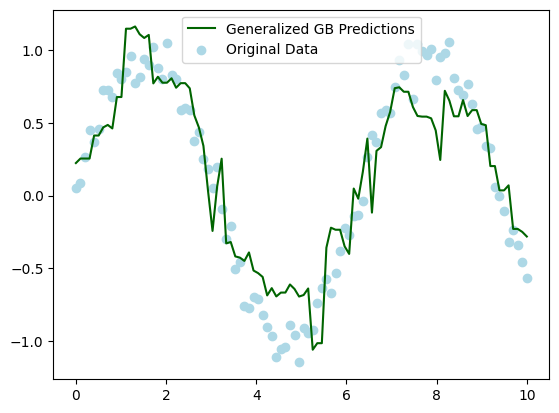

In [15]:
from GradientBoosting import *
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)  # For reproducibility
X = np.linspace(0, 10, 100)[:, np.newaxis]  # Features
y = np.sin(X).flatten() + np.random.normal(0, 0.1, X.shape[0])  # Target with some noise

# Instantiate the generalized gradient boosting regressor with decision tree as weak learner
gen_gb_regressor = GeneralizedBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    weak_learner=DecisionTreeRegressor(max_depth=4),
    adaboost_resampling_proportion=.1
)

# Fit the model to your dataset
gen_gb_regressor.fit(X, y)

# Make predictions
y_pred_gen_gb = gen_gb_regressor.predict(X)

# Plot the results
plt.scatter(X, y, color='lightblue', label='Original Data')
plt.plot(X, y_pred_gen_gb, color='darkgreen', label='Generalized GB Predictions')
plt.legend()
plt.show()


In [56]:
from dppy.finite_dpps import FiniteDPP
from scipy.linalg import qr
seed = 0
rng = np.random.RandomState(seed)

r, N = 4, 10
eig_vals = np.ones(r)  # For projection DPP
eig_vecs, _ = qr(rng.randn(N, r), mode='economic')

DPP = FiniteDPP(kernel_type='correlation',
                projection=True,
                **{'K': (eig_vecs * eig_vals).dot(eig_vecs.T)})

for mode in ('GS', 'Schur', 'Chol'):  # default: GS

    rng = np.random.RandomState(seed)
    DPP.flush_samples()

    for _ in range(10):
        DPP.sample_exact(mode=mode, random_state=rng)

    print(DPP.sampling_mode)
    print(DPP.list_of_samples)

DPP = FiniteDPP(kernel_type='correlation',
                projection=True,
                **{'K': (eig_vecs * eig_vals).dot(eig_vecs.T)})
DPP.sample_exact(mode='GS', random_state=rng)

GS
[[5, 7, 2, 1], [4, 6, 2, 9], [9, 2, 6, 4], [5, 9, 0, 1], [0, 8, 6, 7], [9, 6, 2, 7], [0, 6, 2, 9], [5, 2, 1, 8], [5, 4, 0, 8], [5, 6, 9, 1]]
Schur
[[5, 7, 2, 1], [4, 6, 2, 9], [9, 2, 6, 4], [5, 9, 0, 1], [0, 8, 6, 7], [9, 6, 2, 7], [0, 6, 2, 9], [5, 2, 1, 8], [5, 4, 0, 8], [5, 6, 9, 1]]
Chol
[[5, 7, 6, 0], [4, 6, 5, 7], [9, 5, 0, 1], [5, 9, 2, 4], [0, 8, 1, 7], [9, 0, 5, 1], [0, 6, 5, 9], [5, 0, 1, 9], [5, 0, 2, 8], [5, 6, 9, 1]]
